##### 1. С сайта dzen news (https://dzen.ru/news) необходимо собрать краткий текст и названия всех статей за последний месяц (на момент выполнения) с ключевым словом "игра".
Попробуем использовать библиотеку selenium, тк варианты с использованием beautifulsoup, requests, selectolax для сайта не сработали 

In [49]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException, TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selectolax.parser import HTMLParser
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

In [31]:
browser = webdriver.Chrome()
url = 'https://dzen.ru/news'
browser.get(url)

В поле поиска передадим ключевое слово, таким образом отберем все статьи содержашие слово 'игра'.

In [32]:
search_box = browser.find_element("class name", "news-dzen-header-redesign-search__input")
search_box.send_keys("игра")
search_box.send_keys(Keys.ENTER)

Нужно применить фильтр по времени, на странице есть вариант выбрать период самостоятельно, при нажатии выпадает календарь, выберем нужный промежуток времени, для этого обратимся к элементам-кнопкам календаря

In [33]:
element = browser.find_element(By.XPATH,"//span[@id='label-radio-0-7']").click()
date_element = browser.find_element(By.CSS_SELECTOR, '.Calendar-DateButton.Calendar-DateButton_today').click()
click_previous = browser.find_element(By.CSS_SELECTOR, '.Calendar-NavigationTitleButton').click()
september_element = browser.find_element(By.XPATH, '//span[@class="Calendar-Date" and contains(text(), "сент.")]/..').click()
day_six_element = browser.find_element(By.XPATH, '//span[@class="Calendar-Date" and contains(text(), "6")]/..').click()
apply_button = browser.find_element(By.XPATH, '//span[@class="Button2-Text" and text()="Применить"]/ancestor::button').click()

Теперь находимся на отфильтрованной странице. Будем обращаться к элементам заголовка статьи и элементу контекста, на одной странице изначально отображается 20 записей, внизу находится кнопка "показать еще", будем нажимать ее и выводить данные.

In [44]:
def print_article_titles(title_lst, content_lst):
    article_content = browser.find_elements("class name",'mg-text-cut')
    article_headers = browser.find_elements("class name",'mg-snippet__title')
    for title, article in  zip(article_headers, article_content):
        content_lst.append(str(article.text))
        title_lst.append(str(title.text))
        

In [50]:
content_lst = []
title_lst = []
while True:
    print_article_titles(title_lst, content_lst)

    try:
        show_more_button = WebDriverWait(browser, 7).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@class="Button2 Button2_view_action Button2_size_m mg-button mg-load-more__button"]'))
        )
        show_more_button.click()


    except TimeoutException as e:
        print(f"Превышен таймаут ожидания: {e}")
        break
    except NoSuchElementException as e:
        print(f"Элемент не найден: {e}")
        break
    except Exception as e:
        print(f"Произошла неизвестная ошибка: {e}")
        break

Превышен таймаут ожидания: Message: 
Stacktrace:
0   chromedriver                        0x00000001006e6d68 chromedriver + 4337000
1   chromedriver                        0x00000001006dede4 chromedriver + 4304356
2   chromedriver                        0x000000010030ba5c chromedriver + 293468
3   chromedriver                        0x0000000100350d50 chromedriver + 576848
4   chromedriver                        0x000000010038b908 chromedriver + 817416
5   chromedriver                        0x0000000100344a5c chromedriver + 526940
6   chromedriver                        0x0000000100345908 chromedriver + 530696
7   chromedriver                        0x00000001006acdb4 chromedriver + 4099508
8   chromedriver                        0x00000001006b1270 chromedriver + 4117104
9   chromedriver                        0x00000001006b74fc chromedriver + 4142332
10  chromedriver                        0x00000001006b1d70 chromedriver + 4119920
11  chromedriver                        0x000000010068

Сформируем для удобства датафрейм Заголовок - Текст

In [47]:
df = pd.DataFrame(list(zip(title_lst, content_lst)),
               columns =['title', 'content_cut'])
pd.set_option('display.max_colwidth', None)

In [51]:
df.head()

,title,content_cut
0,В Ноябрьске презентовали настольную игру о Ямале,"...патриотического воспитания «Авангард» разработала настольную игру о Ямале. Рассчитана она на компанию от 4 человек, а рекомендуемый возраст — от 10 лет. Игра поможет больше узнать о жизни нашего округа, культуре и традициях коренных народов Севера. Участники соревнуются в объяснении слов, связанных с регионом. Среди них «аркан», «варган», «полярки» и «Мангазея...\nМИГ-ТВ\n07:58"
1,В городе на Неве стартовали III Всероссийские студенческие игры национальных и неолимпийских видов спорта,"...Всероссийские студенческие игры. В рамках соревнований, которые завершатся 7 октября, будут разыграны медали в 12 видах спорта, не входящих в программу Олимпийских игр. Об этом сообщается на портале https://kfis.gov.spb.ru/ Игры проводятся на базе Спортивного комплекса «Политехник» (Политехническая ул., 27). Это масштабное мероприятие, призванное объединить молодежь со...\n«Питер спортивный»\n12:16"
2,Тарасова: «Сможем заменить Олимпийские игры внутренними соревнованиями. По качеству мы не упадем»,"...том, как на России скажется не допуск к участию в Олимпийских играх. «Не вижу причин, чтобы нас допустили до следующего зимнего цикла Игр. У них своя линия поведения, и они совершенно к нам относятся недружественно. Трагедия ли пропуск Игр в Париже? Нет, не трагедия. Но это очень грустно. Грустно за...\nSport24.ru\n17:11"
3,Коробки со S.T.A.L.K.E.R. 2 были замечены в Америке — игра находится в разделе «скоро выйдет»,"Сеть американских магазинов Gamestop выставила коробки с игрой... на витрины с подписью «скоро выйдет... Фото Gamestop Подробностей не так много — нет ни цены, ни примерной даты выхода, но шутер находится в одном разделе с играми, которые выйдут до конца 2024 года. Среди них Prince Of Persia: The Lost Crown, Alone...\nСпорт-Экспресс\n17:35"
4,Watch Dogs стала самой незаслуженно обруганной игрой в истории,"Пользователи Reddit выбрали самую незаслуженно обруганную игру — ей стала Watch Dogs от Ubisoft. Watch Dogs. Фото Ubisoft «Единственный минус игры — обман от разработчиков и несбывшиеся обещания. Если играть в Watch Dogs в отрыве от обещаний — это вполне неплохая игра с открытым миром, интересными возможностями и фишками», — комментарий пользователя Reddit. «Этот...\nСпорт-Экспресс\n21:21"


##### 2. Для полученных статей необходимо рассчитать топ-50 наиболее частотных слов и представить их в виде word (tag) cloud.

In [151]:
import numpy as np
import pymorphy2
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import word_tokenize

Возьмем полученный текст из заголовков и контента, удалим из него все знаки пунктуации.

In [152]:
def remove_punctuation(result_string):
    translator = str.maketrans('', '', string.punctuation)
    no_punct = result_string.translate(translator)
    new_result_string = no_punct.replace('«', '').replace('»', '').split("\n",1)[0]   
    return  new_result_string

In [153]:
full_lst = ''
for row in range(df.shape[0]):
    current_row = ' '.join(df.values[row])
    full_lst += remove_punctuation(current_row)

Токенизируем слова и попробуем лемматизировать слова.

In [154]:
text = word_tokenize(full_lst)
lemmatizer = pymorphy2.MorphAnalyzer()

In [155]:
def lemmatize_text(tokens):
    text_new=''
    for word in tokens:
        word = lemmatizer.parse(word)
        text_new = text_new + ' ' + word[0].normal_form
    return text_new

Из модуля nltk возьмем стоп слова, удалим их из нашего списка, отберем 50 наиболее популярных слов и передадим их в облако слов.

(-0.5, 399.5, 199.5, -0.5)

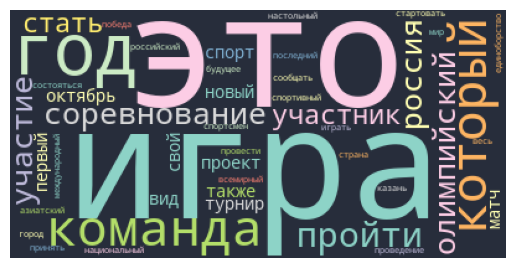

In [167]:
for_count = []
stop_words = stopwords.words('russian')
lemma_result = lemmatize_text(text)
for word in lemma_result.split():
    if word not in stop_words:
        for_count.append(word)
count = Counter(for_count)
most_frequent = count.most_common(50)
words_only = [word for word, _ in most_frequent]
result_for_cloud = ' '.join(words_only)
cloud = WordCloud(stopwords=stop_words, contour_color='#2e3043', background_color='#272d3b', colormap='Set3', max_words=50).generate(result_for_cloud)
plt.imshow(cloud)
plt.axis('off')